In [ ]:
#Preparation

In [91]:
#Importing the libraries as required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, roc_auc_score
import seaborn as sns
import shap

In [170]:
#Uploading the dataset for analysis
dataset = pd.read_csv('data.csv')

In [171]:
#Formatting the dataset with headers
dataset.columns = ["ID", "Diagnosis", "Mean_R", "Mean_Tex", "Mean_Perim", "Mean_A", "Mean_Smooth", "Mean_Comp", "Mean_Concav", "Mean_CPts", "Mean_Sym", "Mean_FractDim",
                  "SE_R", "SE_Tex", "SE_Perim", "SE_A", "SE_Smooth", "SE_Comp", "SE_Concav", "SE_CPts", "SE_Sym", "SE_FractDim",
                  "Worst_R", "Worst_Tex", "Worst_Perim", "Worst_A", "Worst_Smooth", "Worst_Comp", "Worst_Concav", "Worst_CPts", "Worst_Sym", "Worst_FractDim"]
dataset['Diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)

In [172]:
#Splitting the dataset into segments
X = dataset.iloc[:, 22:32].values
y = dataset.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [173]:
#Standardizing the features of dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = dataset.columns[22:32])
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = dataset.columns[22:32])

In [28]:
#Modelling

In [174]:
#Training the logestic regression model
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)
y_pred1 = LR.predict(X_test)

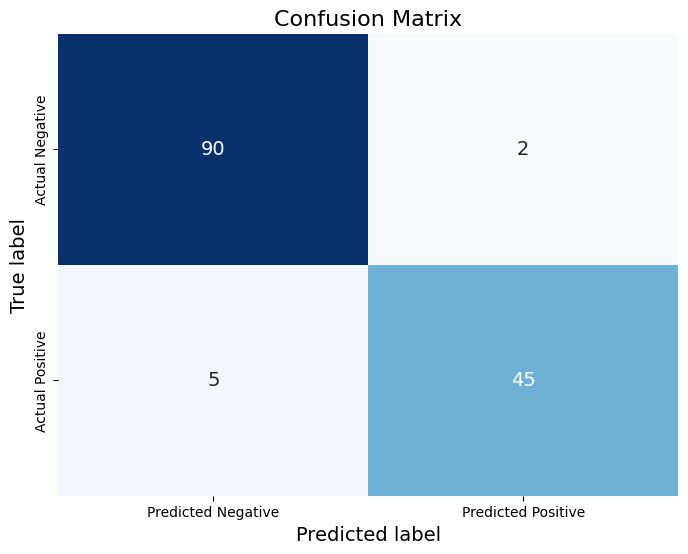

In [175]:
#Creating the model confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

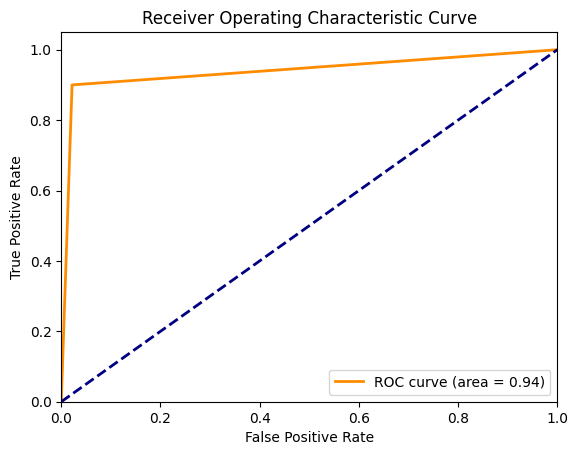

In [176]:
#Graphing the curve for AUC
fpr, tpr, _ = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [177]:
#Training the support vector model
SV = SVC(kernel = 'rbf', probability = True, random_state = 0)
SV.fit(X_train, y_train)
y_pred2 = SV.predict(X_test)

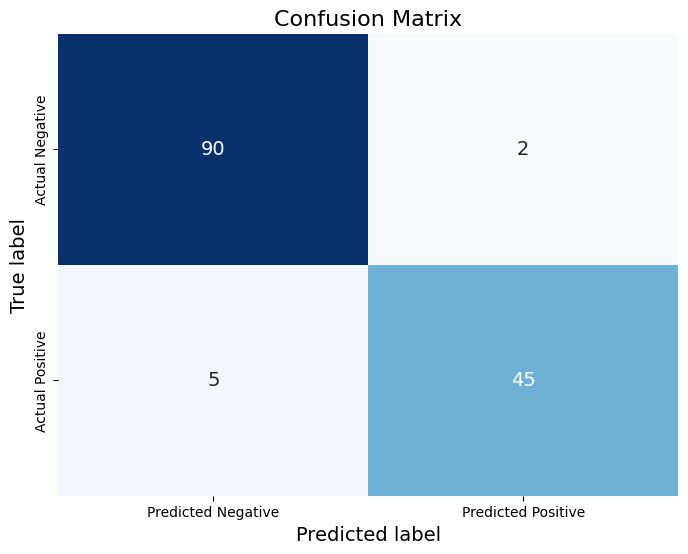

In [178]:
#Creating the model confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

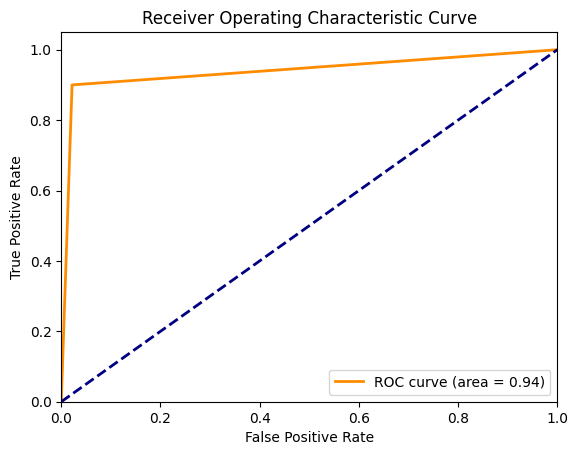

In [179]:
#Graphing the curve for AUC
fpr, tpr, _ = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [180]:
#Training the nearest neighbor model
KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KN.fit(X_train, y_train)
y_pred3 = KN.predict(X_test)

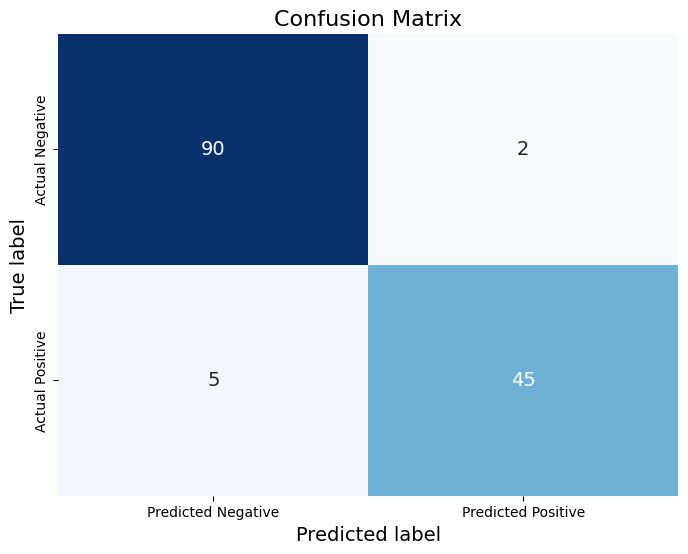

In [181]:
#Creating the model confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

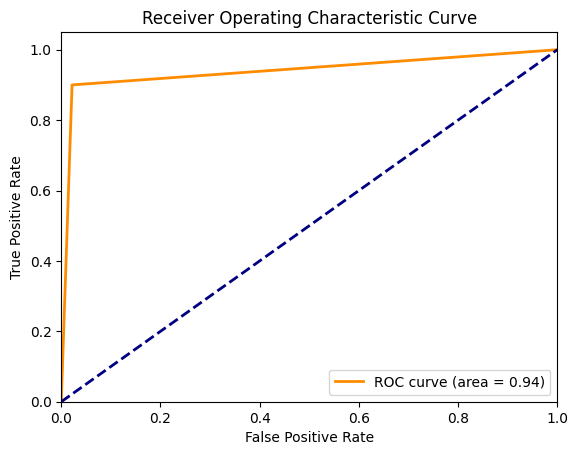

In [182]:
#Graphing the curve for AUC
fpr, tpr, _ = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [183]:
#Training the decision tree model
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)
y_pred4 = DT.predict(X_test)

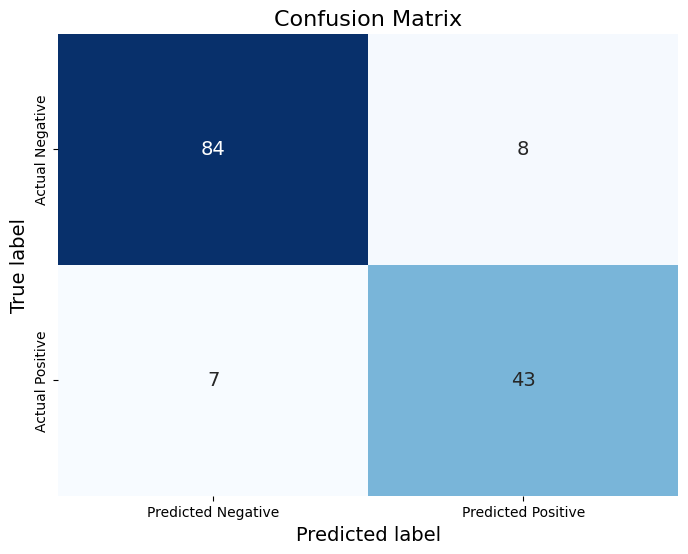

In [184]:
#Creating the model confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

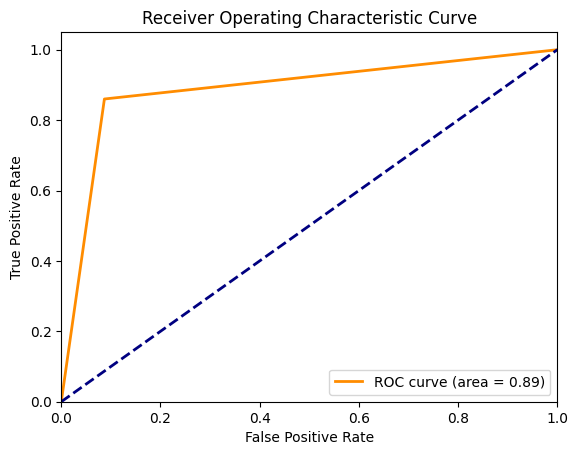

In [185]:
#Graphing the curve for AUC
fpr, tpr, _ = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [186]:
#Training the random forest model
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)
y_pred5 = RF.predict(X_test)

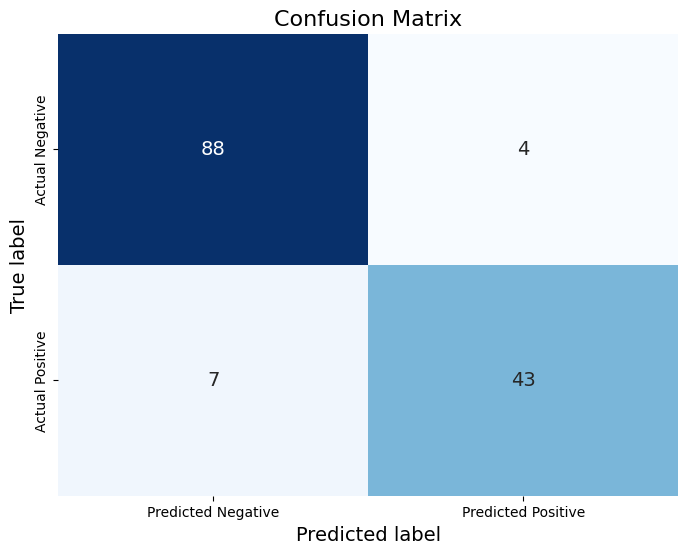

In [187]:
#Creating the model confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

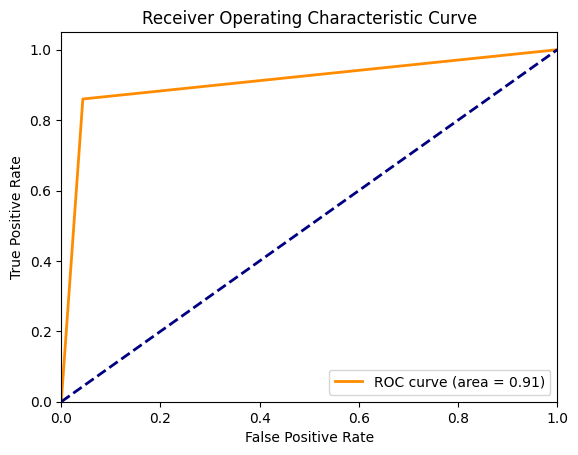

In [188]:
#Graphing the curve for AUC
fpr, tpr, _ = roc_curve(y_test, y_pred5)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Evaluation

In [189]:
#Creating the accuracy for evaluation
as1 = accuracy_score(y_test, y_pred1)
print("Logestic Regression")
print(as1)

as2 = accuracy_score(y_test, y_pred2)
print("Support Vector")
print(as2)

as3 = accuracy_score(y_test, y_pred3)
print("Nearest Neighbor")
print(as3)

as4 = accuracy_score(y_test, y_pred4)
print("Decision Trees")
print(as4)

as5 = accuracy_score(y_test, y_pred5)
print("Random Forest")
print(as5)

Logestic Regression
0.9507042253521126
Support Vector
0.9507042253521126
Nearest Neighbor
0.9507042253521126
Decision Trees
0.8943661971830986
Random Forest
0.9225352112676056


In [190]:
#Creating the sensitivity for evaluation
tn1, fp1, fn1, tp1 = cm1.ravel()
st1 = tp1 / (tp1 + fn1)
print("Logestic Regression")
print(st1)

tn2, fp2, fn2, tp2 = cm2.ravel()
st2 = tp2 / (tp2 + fn2)
print("Support Vector")
print(st2)

tn3, fp3, fn3, tp3 = cm3.ravel()
st3 = tp3 / (tp3 + fn3)
print("Nearest Neighbor")
print(st3)

tn4, fp4, fn4, tp4 = cm4.ravel()
st4 = tp4 / (tp4 + fn4)
print("Decision Tree")
print(st4)

tn5, fp5, fn5, tp5 = cm5.ravel()
st5 = tp5 / (tp5 + fn5)
print("Random Forest")
print(st5)

Logestic Regression
0.9
Support Vector
0.9
Nearest Neighbor
0.9
Decision Tree
0.86
Random Forest
0.86


In [191]:
#Creating the specificity for evaluation
sf1 = tn1 / (tn1 + fp1)
print("Logestic Regression")
print(sf1)

sf2 = tn2 / (tn2 + fp2)
print("Support Vector")
print(sf2)

sf3 = tn3 / (tn3 + fp3)
print("Nearest Neighbor")
print(sf3)

sf4 = tn4 / (tn4 + fp4)
print("Decision Tree")
print(sf4)

sf5 = tn5 / (tn5 + fp5)
print("Random Forest")
print(sf5)

Logestic Regression
0.9782608695652174
Support Vector
0.9782608695652174
Nearest Neighbor
0.9782608695652174
Decision Tree
0.9130434782608695
Random Forest
0.9565217391304348


In [169]:
#Creating the accuracy for evaluation
print("Logestic Regression")
roc_aucLR = roc_auc_score(y_test, y_pred1)
print(roc_aucLR)

print("Support Vector")
roc_aucSV = roc_auc_score(y_test, y_pred2)
print(roc_aucSV)

print("Nearest Neighbor")
roc_aucKN = roc_auc_score(y_test, y_pred3)
print(roc_aucKN)

print("Decision Trees")
roc_aucDT = roc_auc_score(y_test, y_pred4)
print(roc_aucDT)

print("Random Forest")
roc_aucRF = roc_auc_score(y_test, y_pred5)
print(roc_aucRF)

Logestic Regression
0.9391304347826087
Support Vector
0.9391304347826087
Nearest Neighbor
0.9391304347826087
Decision Trees
0.8865217391304349
Random Forest
0.9082608695652173


  0%|          | 0/142 [00:00<?, ?it/s]

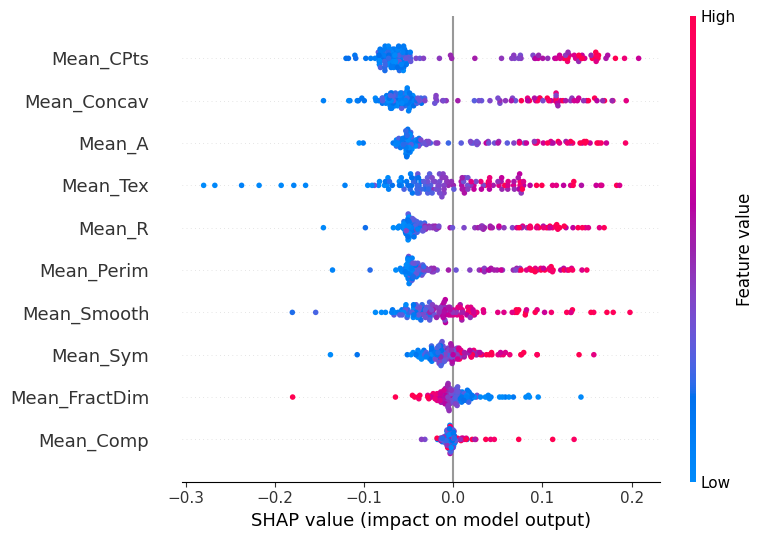

In [89]:
#Creating the SHAP for evaluation
explainer = shap.KernelExplainer(SV.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)